In [93]:
import nltk

In [94]:
import numpy as np
import pandas as pd

In [95]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\archive\Consumer_Complaints.csv')

In [96]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025010 entries, 0 to 1025009
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Date received                 1025010 non-null  object 
 1   Product                       1025010 non-null  object 
 2   Sub-product                   789840 non-null   object 
 3   Issue                         1025010 non-null  object 
 4   Sub-issue                     528853 non-null   object 
 5   Consumer Complaint            277814 non-null   object 
 6   Company Public Response       318364 non-null   object 
 7   Company                       1025010 non-null  object 
 8   State                         1012650 non-null  object 
 9   ZIP code                      1008292 non-null  object 
 10  Tags                          141588 non-null   object 
 11  Consumer consent provided?    491911 non-null   object 
 12  Submitted via               

In [98]:
df['Consumer Complaint']

0                                                        NaN
1          I have outdated information on my credit repor...
2          I purchased a new car on XXXX XXXX. The car de...
3                                                        NaN
4                                                        NaN
                                 ...                        
1025005                                                  NaN
1025006    I had an account with XXXX in XX/XX/XXXX this ...
1025007    I was contacted on XX/XX/XXXX email by XXXX fr...
1025008                                                  NaN
1025009    I had a debit that was included in my chapter ...
Name: Consumer Complaint, Length: 1025010, dtype: object

In [99]:
df['Consumer Complaint']=df['Consumer Complaint'].replace(np.nan,'0')

In [100]:
df['Consumer Complaint'].value_counts()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [101]:
df.shape

(1025010, 19)

In [102]:
df['Product']

0                  Mortgage
1          Credit reporting
2             Consumer Loan
3               Credit card
4           Debt collection
                 ...       
1025005     Debt collection
1025006     Debt collection
1025007            Mortgage
1025008     Debt collection
1025009     Debt collection
Name: Product, Length: 1025010, dtype: object

In [103]:
df['Product'].value_counts()

Mortgage                                                                        254165
Debt collection                                                                 196212
Credit reporting                                                                140433
Credit reporting, credit repair services, or other personal consumer reports    110756
Credit card                                                                      89191
Bank account or service                                                          86206
Student loan                                                                     42969
Consumer Loan                                                                    31606
Credit card or prepaid card                                                      22913
Checking or savings account                                                      18982
Money transfer, virtual currency, or money service                                5785
Vehicle loan or lease                      

In [104]:
df['Product'].unique()

array(['Mortgage', 'Credit reporting', 'Consumer Loan', 'Credit card',
       'Debt collection', 'Student loan', 'Bank account or service',
       'Other financial service', 'Prepaid card', 'Money transfers',
       'Checking or savings account',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Payday loan',
       'Money transfer, virtual currency, or money service',
       'Credit card or prepaid card', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan', 'Virtual currency'],
      dtype=object)

In [105]:
df['Consumer Complaint'].values

array(['0',
       'I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements',
       "I purchased a new car on XXXX XXXX. The car dealer called Citizens Bank to get a 10 day payoff on my loan, good till XXXX XXXX. The dealer sent the check the next day. When I balanced my checkbook on XXXX XXXX. I noticed that Citizens bank had taken the automatic payment out of my checking account at XXXX XXXX XXXX Bank. I called Citizens and they stated that they did not close the loan until XXXX XXXX. ( stating that they did not receive the check until XXXX. XXXX. ). I told them that I did not believe that the check took that long to arrive. XXXX told me a check was issued to me for the amount overpaid, they deducted additional interest. Today ( XXXX XXXX, ) I called Citizens Bank again and talked to a supervisor named XXXX, because on XXXX XXXX. I received

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test=train_test_split(df['Consumer Complaint'].values,df['Product'].values,test_size=0.15,random_state=0)

In [108]:
print('Training Occurences:{}'.format(X_train.shape[0]))

Training Occurences:871258


In [109]:
print('Testing occurences:{}'.format(X_test.shape[0]))

Testing occurences:153752


In [110]:
df.isna().apply(pd.value_counts).T

,False,True
Date received,1025010.0,NaN
Product,1025010.0,NaN
Sub-product,789840.0,235170.0
Issue,1025010.0,NaN
Sub-issue,528853.0,496157.0
Consumer Complaint,1025010.0,NaN
Company Public Response,318364.0,706646.0
Company,1025010.0,NaN
State,1012650.0,12360.0
ZIP code,1008292.0,16718.0


In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [112]:
vectorizer=TfidfVectorizer()

In [113]:
vectorizer.fit(X_train)

TfidfVectorizer()

In [114]:
X_train=vectorizer.transform(X_train)
X_test=vectorizer.transform(X_test)

In [115]:
X_train

<871258x92764 sparse matrix of type '<class 'numpy.float64'>'
	with 21475233 stored elements in Compressed Sparse Row format>

In [116]:
X_test

<153752x92764 sparse matrix of type '<class 'numpy.float64'>'
	with 3812732 stored elements in Compressed Sparse Row format>

In [127]:
from sklearn.feature_selection import SelectKBest,chi2


In [128]:
ch2=SelectKBest(chi2,k=5000)

In [131]:
from sklearn.naive_bayes import MultinomialNB

In [132]:
model=MultinomialNB()

In [133]:
model.fit(X_train,y_train)

MultinomialNB()

In [134]:
pred=model.predict(X_test)

In [137]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [138]:
accuracy_score(y_test,pred)

0.3566847910921484

In [142]:
cf=confusion_matrix(y_test,pred)

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

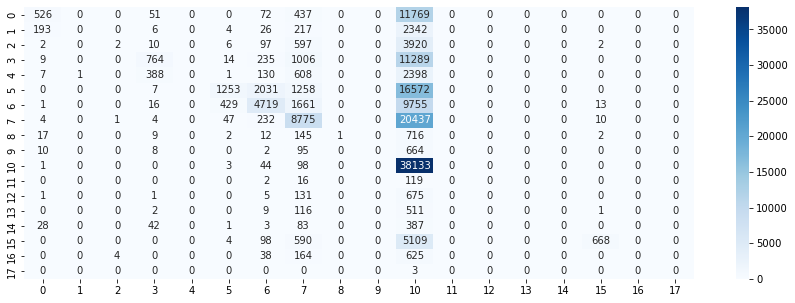

In [145]:
plt.figure(figsize=(15,5))
sns.heatmap(cf,cmap='Blues',annot=True,fmt='g')
plt.show()

In [148]:
print(classification_report(y_test,pred))

C:\Users\DELL\anaconda-3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda-3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.66      0.04      0.08     12855
                                                 Checking or savings account       0.00      0.00      0.00      2788
                                                               Consumer Loan       0.29      0.00      0.00      4636
                                                                 Credit card       0.58      0.06      0.10     13317
                                                 Credit card or prepaid card       0.00      0.00      0.00      3533
                                                            Credit reporting       0.71      0.06      0.11     21121
Credit reporting, credit repair services, or other personal consumer reports       0.61      0.28      0.39     16594
                                                       

C:\Users\DELL\anaconda-3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
